In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('titanic_dataset.csv')

In [3]:
df.shape

(891, 12)

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: xlabel='Survived'>

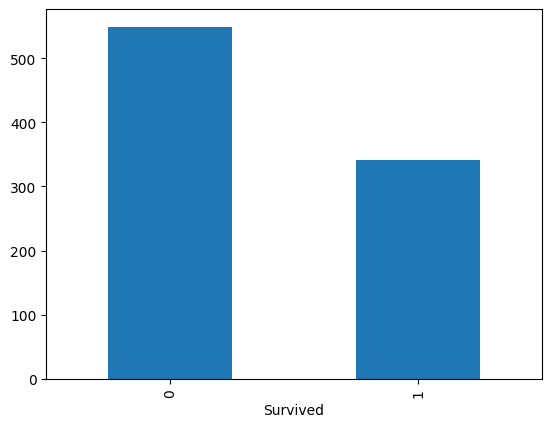

In [8]:
df['Survived'].value_counts().plot(kind='bar')

In [9]:
df.drop(columns=['Cabin'], inplace=True)

In [10]:
print(df.Embarked.value_counts())

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


In [11]:
df['Embarked'].fillna('S', inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8556\448288291.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna('S', inplace=True)


In [12]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [13]:
age = np.random.randint(df['Age'].mean()-df['Age'].std(), df['Age'].mean()+df['Age'].std(),177)

In [14]:
age

array([27, 42, 32, 42, 16, 15, 25, 15, 27, 16, 37, 32, 24, 37, 20, 29, 39,
       32, 41, 21, 40, 24, 17, 18, 42, 15, 15, 34, 39, 22, 43, 16, 17, 32,
       42, 38, 29, 24, 23, 22, 38, 40, 29, 32, 23, 42, 29, 32, 16, 36, 27,
       27, 40, 31, 32, 34, 34, 22, 25, 36, 33, 22, 29, 29, 40, 40, 25, 27,
       18, 18, 28, 30, 41, 17, 38, 39, 23, 24, 16, 43, 37, 30, 37, 41, 43,
       27, 30, 25, 26, 21, 15, 22, 21, 19, 21, 40, 22, 20, 16, 42, 31, 33,
       43, 21, 24, 16, 15, 27, 24, 28, 20, 30, 32, 18, 33, 19, 24, 23, 41,
       37, 30, 33, 19, 43, 27, 29, 41, 27, 39, 37, 31, 22, 34, 17, 38, 19,
       23, 43, 16, 35, 23, 28, 15, 19, 32, 18, 40, 26, 18, 19, 19, 39, 37,
       23, 24, 26, 28, 15, 24, 32, 28, 28, 18, 41, 23, 37, 31, 27, 18, 27,
       24, 37, 31, 22, 38, 20, 29])

In [15]:
df['Age'][df['Age'].isnull()] = age

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8556\1093781022.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['Age'][df['Age'].isnull()] = age
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8556\1093781022.py:1: SettingWithCopyWarning: 


In [16]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

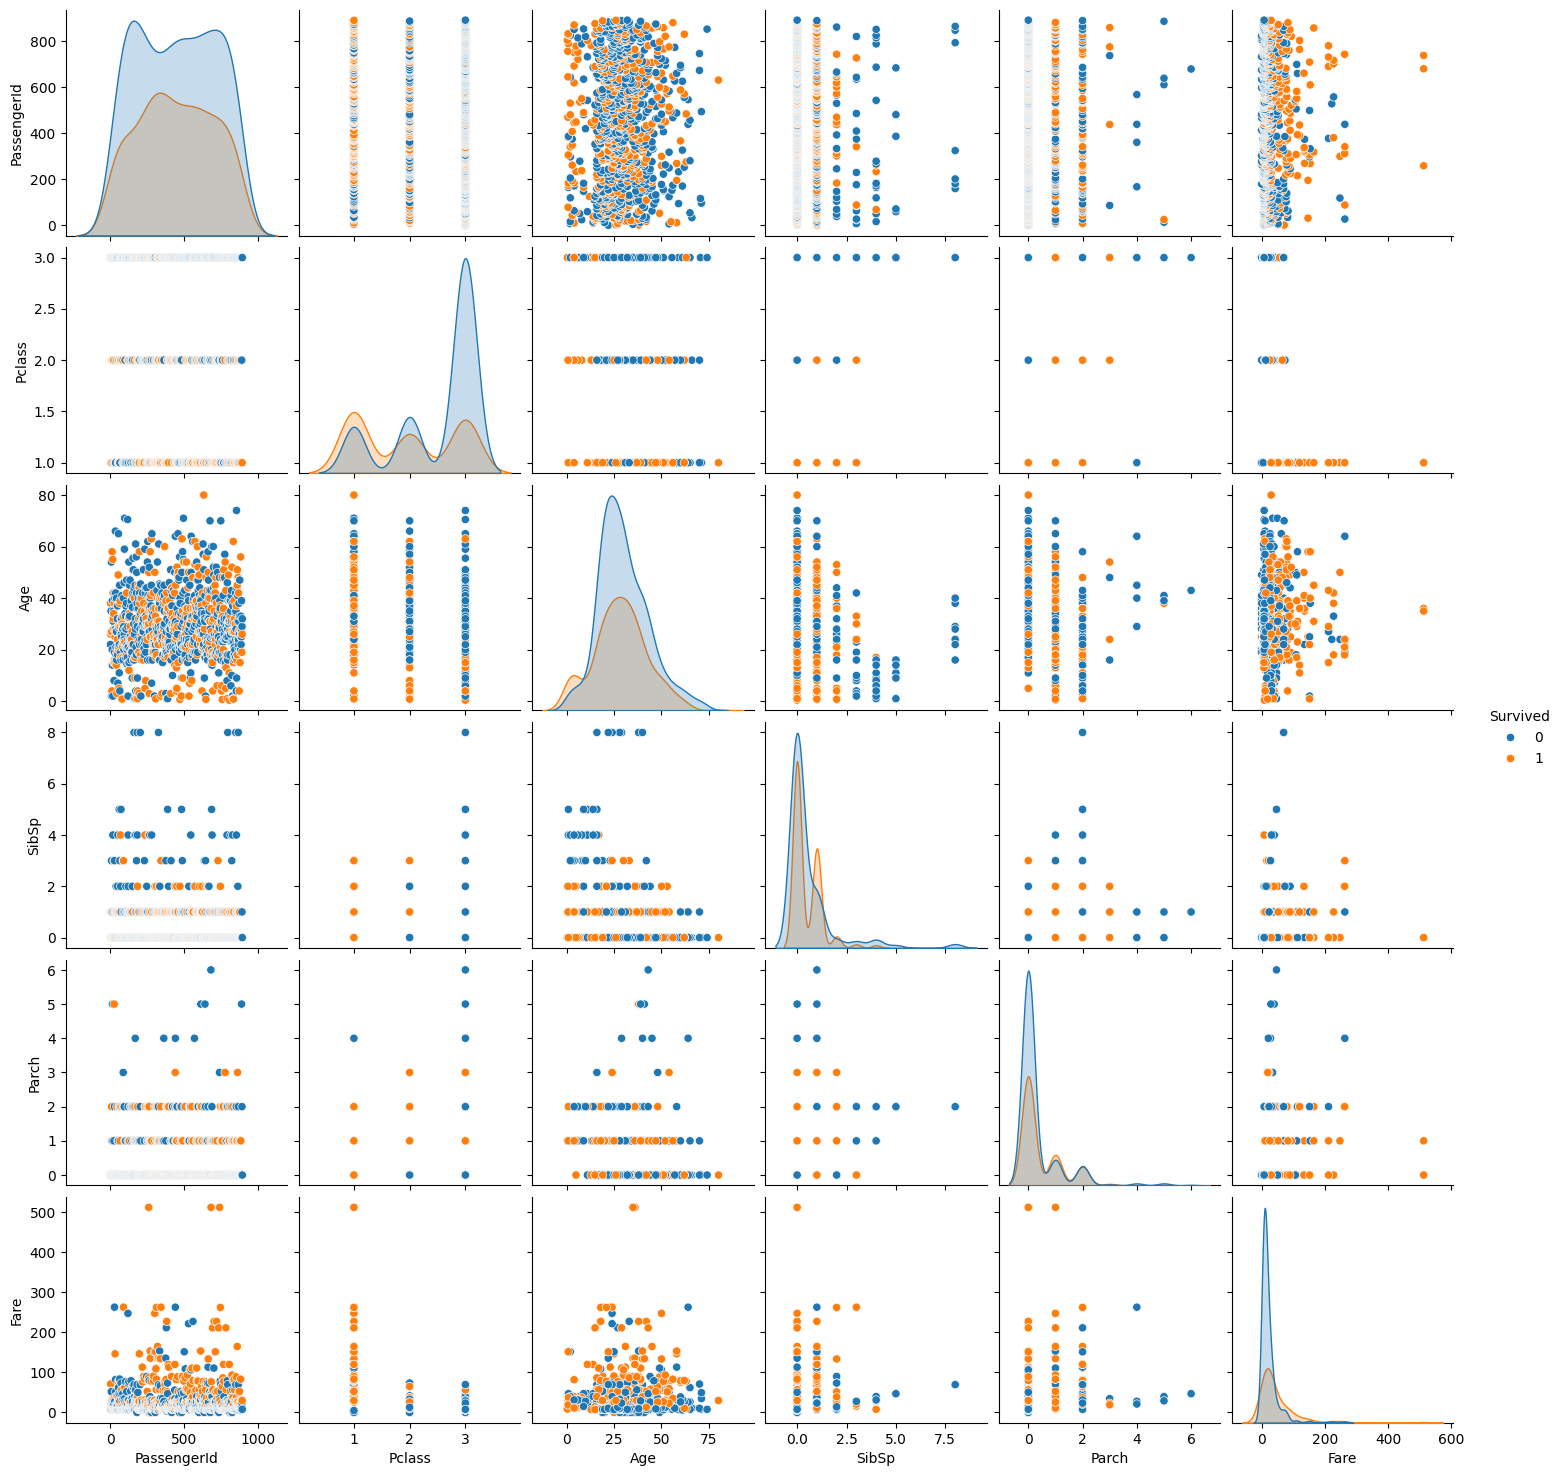

In [17]:
sns.pairplot(df, hue='Survived')
plt.show()

##PAIRPLOT :  
This graph shows that most of the survivers fulfilled one or more of the following categories:
1) Survivors were more likely to be from Pclass 1 (1st class).
2) Survivers were mostly likely to be females
3) Most survivers were below 40 years with children being the maximum numbers
4) Passengers who boarded at Cherbourg (C) had higher survival rates.
5) Small and large families had greater survival rates

<Axes: xlabel='Pclass', ylabel='Survived'>

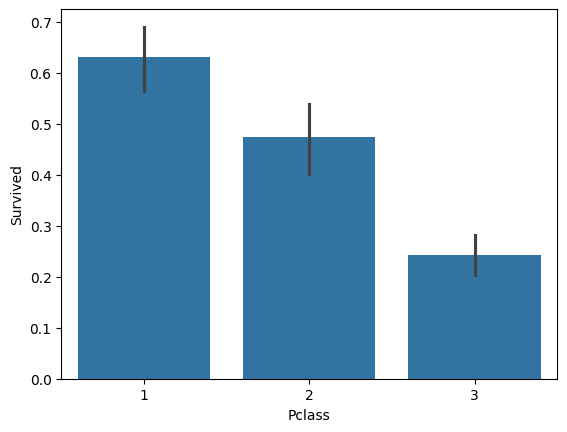

In [18]:
sns.barplot(x=df['Pclass'], y=df['Survived'])

In [19]:
df.drop(columns=['Ticket'], inplace = True)

In [20]:
df['family'] = df['SibSp']+df['Parch']+1

In [21]:
df['family'].value_counts()

family
1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: count, dtype: int64

In [22]:
df.groupby(['family']['survived']).mean()

<>:1: SyntaxWarning: list indices must be integers or slices, not str; perhaps you missed a comma?
<>:1: SyntaxWarning: list indices must be integers or slices, not str; perhaps you missed a comma?
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8556\2325807054.py:1: SyntaxWarning: list indices must be integers or slices, not str; perhaps you missed a comma?
  df.groupby(['family']['survived']).mean()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8556\2325807054.py:1: SyntaxWarning: list indices must be integers or slices, not str; perhaps you missed a comma?
  df.groupby(['family']['survived']).mean()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8556\2325807054.py:1: SyntaxWarning: list indices must be integers or slices, not str; perhaps you missed a comma?
  df.groupby(['family']['survived']).mean()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8556\2325807054.py:1: SyntaxWarning: list indices must be integers or slices, not str; perhaps you missed a comma?
  df.groupby(['family']['survi

TypeError: list indices must be integers or slices, not str

In [ ]:
df.info()

In [23]:
def cal(n):
    if(n==1):
        return "Alone"
    elif(n>1 and n<5):
        return "Medium"
    else:
        return "Large"

In [24]:
df['family_size'] = df['family'].apply(cal)

In [25]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,family,family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2,Medium
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2,Medium
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2,Medium
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,Alone
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S,1,Alone
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S,1,Alone
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.0,1,2,23.4500,S,4,Medium
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C,1,Alone


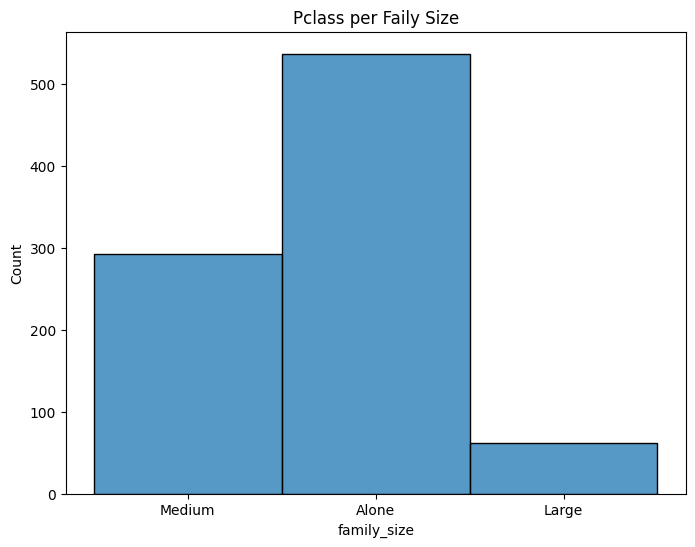

In [26]:
plt.figure(figsize=(8,6))
sns.histplot(df['family_size'])
plt.title('Pclass per Faily Size')
plt.show()

In [27]:
df.drop(columns=['Fare','Name', 'PassengerId'], inplace=True)

In [28]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,family,family_size
0,0,3,male,22.0,1,0,S,2,Medium
1,1,1,female,38.0,1,0,C,2,Medium
2,1,3,female,26.0,0,0,S,1,Alone
3,1,1,female,35.0,1,0,S,2,Medium
4,0,3,male,35.0,0,0,S,1,Alone
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,S,1,Alone
887,1,1,female,19.0,0,0,S,1,Alone
888,0,3,female,29.0,1,2,S,4,Medium
889,1,1,male,26.0,0,0,C,1,Alone


In [29]:
df.drop(columns=['SibSp','Parch','family'], inplace=True)

In [30]:
df

,Survived,Pclass,Sex,Age,Embarked,family_size
0,0,3,male,22.0,S,Medium
1,1,1,female,38.0,C,Medium
2,1,3,female,26.0,S,Alone
3,1,1,female,35.0,S,Medium
4,0,3,male,35.0,S,Alone
...,...,...,...,...,...,...
886,0,2,male,27.0,S,Alone
887,1,1,female,19.0,S,Alone
888,0,3,female,29.0,S,Medium
889,1,1,male,26.0,C,Alone


In [31]:
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])
df['family_size'] = le.fit_transform(df['family_size'])

In [32]:
df

,Survived,Pclass,Sex,Age,Embarked,family_size
0,0,3,1,22.0,2,2
1,1,1,0,38.0,0,2
2,1,3,0,26.0,2,0
3,1,1,0,35.0,2,2
4,0,3,1,35.0,2,0
...,...,...,...,...,...,...
886,0,2,1,27.0,2,0
887,1,1,0,19.0,2,0
888,0,3,0,29.0,2,2
889,1,1,1,26.0,0,0


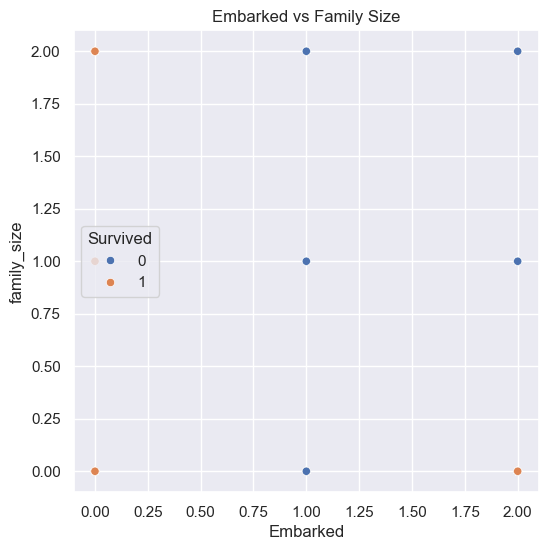

In [33]:
sns.set()
plt.figure(figsize=(6,6))
sns.scatterplot(x='Embarked', y='family_size', data=df, hue='Survived')
plt.title('Embarked vs Family Size')
plt.show()

In this graph:  
1 : survived, 0 : not survived

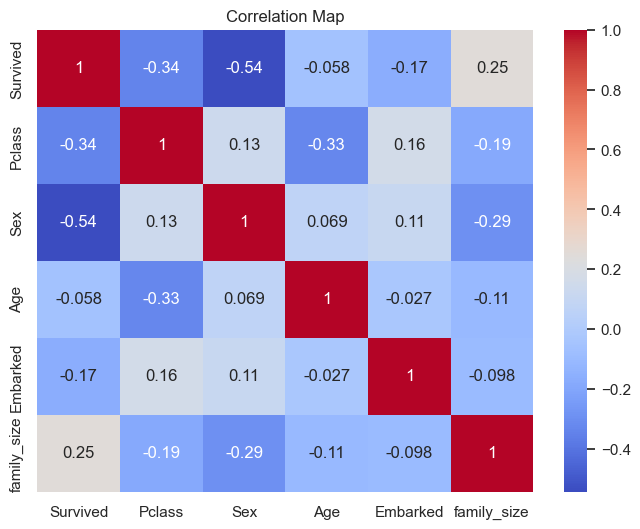

In [34]:
sns.set()
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Map')
plt.show()

In [35]:
x = df.drop(columns='Survived', axis=1)
y = df['Survived']

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [38]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [39]:
svm = SVC()
svm.fit(x_train, y_train)

SVC()

In [40]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [41]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [42]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [43]:
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix, classification_report

In [44]:
train = lr.predict(x_train)
acc = accuracy_score(y_train, train)
print(acc)
ll = log_loss(y_train, train)
print(ll)
cm = confusion_matrix(y_train, train)
print(cm)
cr = classification_report(y_train, train)
print(cr)

0.8019662921348315
7.137858325653817
[[387  62]
 [ 79 184]]
              precision    recall  f1-score   support

           0       0.83      0.86      0.85       449
           1       0.75      0.70      0.72       263

    accuracy                           0.80       712
   macro avg       0.79      0.78      0.78       712
weighted avg       0.80      0.80      0.80       712



In [45]:
train = svm.predict(x_train)
acc = accuracy_score(y_train, train)
print(acc)
ll = log_loss(y_train, train)
print(ll)
cm = confusion_matrix(y_train, train)
print(cm)
cr = classification_report(y_train, train)
print(cr)

0.6530898876404494
12.503907847067326
[[437  12]
 [235  28]]
              precision    recall  f1-score   support

           0       0.65      0.97      0.78       449
           1       0.70      0.11      0.18       263

    accuracy                           0.65       712
   macro avg       0.68      0.54      0.48       712
weighted avg       0.67      0.65      0.56       712



In [46]:
train = knn.predict(x_train)
acc = accuracy_score(y_train, train)
print(acc)
ll = log_loss(y_train, train)
print(ll)
cm = confusion_matrix(y_train, train)
print(cm)
cr = classification_report(y_train, train)
print(cr)

0.8258426966292135
6.277265477879953
[[420  29]
 [ 95 168]]
              precision    recall  f1-score   support

           0       0.82      0.94      0.87       449
           1       0.85      0.64      0.73       263

    accuracy                           0.83       712
   macro avg       0.83      0.79      0.80       712
weighted avg       0.83      0.83      0.82       712



In [47]:
train = rf.predict(x_train)
acc = accuracy_score(y_train, train)
print(acc)
ll = log_loss(y_train, train)
print(ll)
cm = confusion_matrix(y_train, train)
print(cm)
cr = classification_report(y_train, train)
print(cr)

0.9339887640449438
2.379286108551273
[[437  12]
 [ 35 228]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       449
           1       0.95      0.87      0.91       263

    accuracy                           0.93       712
   macro avg       0.94      0.92      0.93       712
weighted avg       0.93      0.93      0.93       712



In [48]:
train = dt.predict(x_train)
acc = accuracy_score(y_train, train)
print(acc)
ll = log_loss(y_train, train)
print(ll)
cm = confusion_matrix(y_train, train)
print(cm)
cr = classification_report(y_train, train)
print(cr)

0.9339887640449438
2.3792861085512724
[[446   3]
 [ 44 219]]
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       449
           1       0.99      0.83      0.90       263

    accuracy                           0.93       712
   macro avg       0.95      0.91      0.93       712
weighted avg       0.94      0.93      0.93       712



In [49]:
test = lr.predict(x_test)
acc = accuracy_score(y_test, test)
print(acc)
ll = log_loss(y_test, test)
print(ll)
cm = confusion_matrix(y_test, test)
print(cm)
cr = classification_report(y_test, test)
print(cr)

0.7653631284916201
8.457170068954863
[[87 13]
 [29 50]]
              precision    recall  f1-score   support

           0       0.75      0.87      0.81       100
           1       0.79      0.63      0.70        79

    accuracy                           0.77       179
   macro avg       0.77      0.75      0.75       179
weighted avg       0.77      0.77      0.76       179



In [50]:
test = knn.predict(x_test)
acc = accuracy_score(y_test, test)
print(acc)
ll = log_loss(y_test, test)
print(ll)
cm = confusion_matrix(y_test, test)
print(cm)
cr = classification_report(y_test, test)
print(cr)

0.7094972067039106
10.47078199013459
[[91  9]
 [43 36]]
              precision    recall  f1-score   support

           0       0.68      0.91      0.78       100
           1       0.80      0.46      0.58        79

    accuracy                           0.71       179
   macro avg       0.74      0.68      0.68       179
weighted avg       0.73      0.71      0.69       179



In [51]:
test = svm.predict(x_test)
acc = accuracy_score(y_test, test)
print(acc)
ll = log_loss(y_test, test)
print(ll)
cm = confusion_matrix(y_test, test)
print(cm)
cr = classification_report(y_test, test)
print(cr)

0.5754189944134078
15.303450600965942
[[95  5]
 [71  8]]
              precision    recall  f1-score   support

           0       0.57      0.95      0.71       100
           1       0.62      0.10      0.17        79

    accuracy                           0.58       179
   macro avg       0.59      0.53      0.44       179
weighted avg       0.59      0.58      0.48       179



In [52]:
test = rf.predict(x_test)
acc = accuracy_score(y_test, test)
print(acc)
ll = log_loss(y_test, test)
print(ll)
cm = confusion_matrix(y_test, test)
print(cm)
cr = classification_report(y_test, test)
print(cr)

0.770949720670391
8.25580887683689
[[89 11]
 [30 49]]
              precision    recall  f1-score   support

           0       0.75      0.89      0.81       100
           1       0.82      0.62      0.71        79

    accuracy                           0.77       179
   macro avg       0.78      0.76      0.76       179
weighted avg       0.78      0.77      0.77       179



In [53]:
test = dt.predict(x_test)
acc = accuracy_score(y_test, test)
print(acc)
ll = log_loss(y_test, test)
print(ll)
cm = confusion_matrix(y_test, test)
print(cm)
cr = classification_report(y_test, test)
print(cr)

0.776536312849162
8.054447684718916
[[90 10]
 [30 49]]
              precision    recall  f1-score   support

           0       0.75      0.90      0.82       100
           1       0.83      0.62      0.71        79

    accuracy                           0.78       179
   macro avg       0.79      0.76      0.76       179
weighted avg       0.79      0.78      0.77       179

